In [13]:
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Implements a linear Kalman filter.
class KalmanFilterLinear:
  def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
    self.A = _A                      # State transition matrix.
    self.B = _B                      # Control matrix.
    self.H = _H                      # Observation matrix.
    self.current_state_estimate = _x # Initial state estimate.
    self.current_prob_estimate = _P  # Initial covariance estimate.
    self.Q = _Q                      # Estimated error in process.
    self.R = _R                      # Estimated error in measurements.
  def GetCurrentState(self):
    return self.current_state_estimate
  def Step(self,control_vector,measurement_vector):
    #---------------------------Prediction step-----------------------------
    predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
    predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) + self.Q
    #--------------------------Observation step-----------------------------
    innovation = measurement_vector - self.H*predicted_state_estimate
    innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
    #-----------------------------Update step-------------------------------
    kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
    self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
    # We need the size of the matrix so we can make an identity matrix.
    size = self.current_prob_estimate.shape[0]
    # eye(n) = nxn identity matrix.
    self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate

In [15]:
class Voltmeter:
  def __init__(self,_truevoltage,_noiselevel):
    self.truevoltage = _truevoltage
    self.noiselevel = _noiselevel
  def GetVoltage(self):
    return self.truevoltage
  def GetVoltageWithNoise(self):
    return random.gauss(self.GetVoltage(),self.noiselevel)

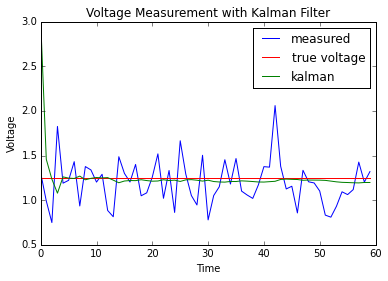

In [16]:
numsteps = 60

A = numpy.matrix([1])
H = numpy.matrix([1])
B = numpy.matrix([0])
Q = numpy.matrix([0.00001])
R = numpy.matrix([0.1])
xhat = numpy.matrix([3])
P    = numpy.matrix([1])

filter = KalmanFilterLinear(A,B,H,xhat,P,Q,R)
voltmeter = Voltmeter(1.25,0.25)

measuredvoltage = []
truevoltage = []
kalman = []

for i in range(numsteps):
    measured = voltmeter.GetVoltageWithNoise()
    measuredvoltage.append(measured)
    truevoltage.append(voltmeter.GetVoltage())
    kalman.append(filter.GetCurrentState()[0,0])
    filter.Step(numpy.matrix([0]),numpy.matrix([measured]))

plt.plot(range(numsteps),measuredvoltage,'b',range(numsteps),truevoltage,'r',range(numsteps),kalman,'g')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage Measurement with Kalman Filter')
plt.legend(('measured','true voltage','kalman'))
plt.show()